In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=0dcb0f8c05f0052932cfa547ab5a025b5aed42d1a9cad802139d195613820fe6
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=40d7a04edf10890610440f1465070fa871ec9f9c2cd170e6047b607e6f722307
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [ ]:
#reading historic data using yfinance
from datetime import date
import yfinance as yf
from yahoofinancials import YahooFinancials
reliance_df = yf.download('RELIANCE.NS', 
                      start='2015-01-01', 
                      end= date.today() , 
                      progress=False)
print(reliance_df.head())
print(reliance_df.tail())

                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2015-01-01  443.149994  446.000000  441.825012  443.950012  415.367096  1354878
2015-01-02  444.049988  448.024994  442.149994  442.774994  414.267700  3351654
2015-01-05  442.500000  445.450012  437.049988  437.924988  409.729980  4619182
2015-01-06  435.000000  436.500000  416.000000  418.049988  391.134613  8516086
2015-01-07  418.549988  429.399994  418.500000  427.149994  399.648712  9472630
                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2020-11-17  2085.000000  2085.000000  ...  1993.250000  21479385
2020-11-18  1993.250000  2006.500000  ...  1987.199951  14030652
2020-11-19  1987.199951  2010.449951  ...  1973.150024  12828008
2020-11-20  1975.000000  1983.800049  ...  1899.500000  26522972
2020-11-23  1951.000000  1970.000000  ...  1950.69

In [ ]:
#import basic libraries and modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

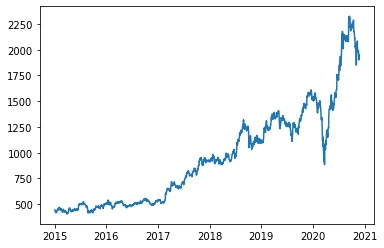

In [ ]:
reliance_df = reliance_df.set_index('Date')
plt.plot(reliance_df['Close'])
plt.show()

In [ ]:
#i am gonna predict the stock closing value 
reliance_df = reliance_df.reset_index()
df = reliance_df[["Date","Close"]]
df.head()

,Date,Close
0,2015-01-01,443.950012
1,2015-01-02,442.774994
2,2015-01-05,437.924988
3,2015-01-06,418.049988
4,2015-01-07,427.149994


**LSTM STOCK PREDICTION MODEL**

In [ ]:
#scaling the data 
from sklearn.preprocessing import MinMaxScaler
data_scaling = MinMaxScaler(feature_range = (0,1))
df['Close_Scaled'] = data_scaling.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
#train test split
#keeping the ratio of 70:30
data_train, data_test = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
data_train.shape, data_test.shape

((1161, 3), (291, 3))

In [ ]:
#creating matrix 
# references: https://www.youtube.com/watch?v=H6du_pfuznE
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# creating dataset with the last 45 days historic data and sentiments score of todays news headlines
data_train_scaled = data_train['Close_Scaled']
data_test_scaled = data_test['Close_Scaled']
train_x, train_y = create_dataset(np.array(data_train_scaled).reshape(-1,1), 60)
test_x, test_y = create_dataset(np.array(data_test_scaled).reshape(-1,1), 60)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1100, 60), (1100,), (230, 60), (230,))

In [ ]:
#creating arrays
#reshaping the input x dataset to 3 dimensions
train_x, train_y = np.array(train_x), np.array(train_y)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

test_x, test_y = np.array(test_x), np.array(test_y)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(train_x.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#reshaping data to three d
model.fit(train_x, train_y, validation_data = (train_x, train_y), epochs=50, batch_size=75)

Epoch 1/50
15/15 [==============================] - 3s 194ms/step - loss: 0.0164 - val_loss: 0.0061
Epoch 2/50
15/15 [==============================] - 2s 132ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3/50
15/15 [==============================] - 2s 127ms/step - loss: 7.7742e-04 - val_loss: 7.0767e-04
Epoch 4/50
15/15 [==============================] - 2s 127ms/step - loss: 5.4516e-04 - val_loss: 5.1044e-04
Epoch 5/50
15/15 [==============================] - 2s 128ms/step - loss: 4.5933e-04 - val_loss: 4.3951e-04
Epoch 6/50
15/15 [==============================] - 2s 129ms/step - loss: 4.4025e-04 - val_loss: 4.1202e-04
Epoch 7/50
15/15 [==============================] - 2s 128ms/step - loss: 4.0567e-04 - val_loss: 4.1476e-04
Epoch 8/50
15/15 [==============================] - 2s 125ms/step - loss: 4.0652e-04 - val_loss: 3.9955e-04
Epoch 9/50
15/15 [==============================] - 2s 130ms/step - loss: 3.9940e-04 - val_loss: 3.9989e-04
Epoch 10/50
15/15 [=========================

In [ ]:
train_predict = model.predict(train_x) 
test_predict = model.predict(test_x)
train_predict

array([[0.0083767 ],
       [0.00723407],
       [0.00623136],
       ...,
       [0.41867787],
       [0.41855812],
       [0.41824192]], dtype=float32)

In [ ]:
#traonsform to orignal form
train_predict1 = data_scaling.inverse_transform(train_predict) 
test_predict1 = data_scaling.inverse_transform(test_predict) 
print(train_predict1)

[[ 421.45135]
 [ 419.25845]
 [ 417.33408]
 ...
 [1208.8911 ]
 [1208.6613 ]
 [1208.0544 ]]


In [ ]:
train_y_re = data_scaling.inverse_transform(train_y.reshape(-1,1))
test_y_re = data_scaling.inverse_transform(test_y.reshape(-1,1))

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("RMSE for train dataset:", math.sqrt(mean_squared_error(train_y_re,train_predict1)))

RMSE for train dataset: 28.74264252507878


In [ ]:
print("RMSE for test dataset:", math.sqrt(mean_squared_error(test_y_re,test_predict1)))

RMSE for test dataset: 127.6207020945131


In [ ]:
result_train = data_train.iloc[61:]
result_test = data_test.iloc[61:]
print(result_train.shape)
print(result_test.shape)

(1100, 3)
(230, 3)


In [ ]:
len(test_predict1)

230

In [ ]:
result_train['predict'] = train_predict1
result_test['predict'] = test_predict1
result_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Close,Close_Scaled,predict
1222,2019-12-23,1571.400024,0.607566,1528.919189
1223,2019-12-24,1546.449951,0.594565,1534.088135
1224,2019-12-26,1515.400024,0.578387,1538.092529
1225,2019-12-27,1542.349976,0.592429,1538.785400
1226,2019-12-30,1544.199951,0.593393,1534.488525


In [ ]:
result_test = result_test.set_index('Date', drop = False)
result_train = result_train.set_index('Date', drop = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1452 non-null   datetime64[ns]
 1   Close         1452 non-null   float64       
 2   Close_Scaled  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 34.2 KB


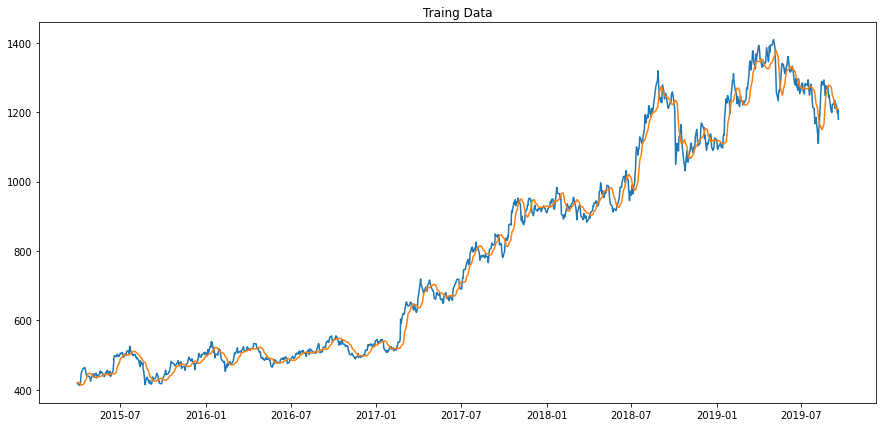

In [ ]:
#plotting training data
plt.figure(figsize=(15, 7))
plt.plot(result_train['Close'])
plt.plot(result_train['predict'])
plt.title("Traning Data")
plt.show()

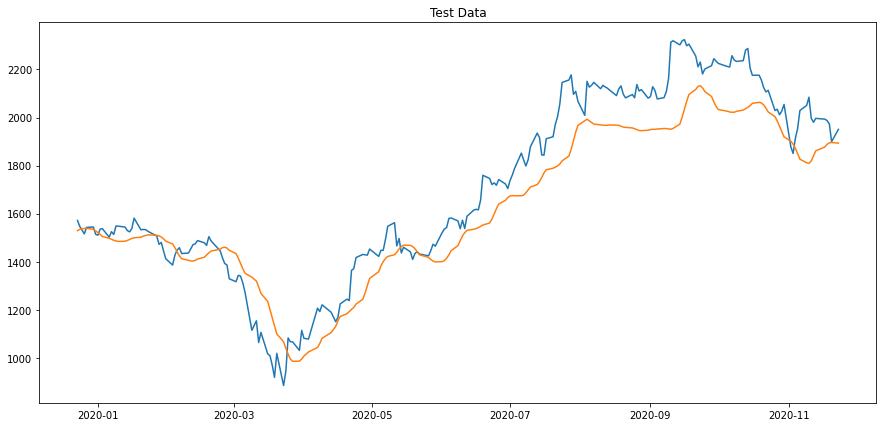

In [ ]:
#plotting training data
plt.figure(figsize=(15, 7))
plt.plot(result_test['Close'])
plt.plot(result_test['predict'])
plt.title("Test Data")
plt.show()